# <span style="color:#54B1FF">Classification:</span> &nbsp; <span style="color:#1B3EA9"><b>Decision Surfaces</b></span>

<br>

This notebook considers how **decision surfaces** can be used to visualize classifier behavior.

In the previous notebook we saw how we can train classifier using *features* and *labels*, and how a trained classifier can be used to predict labels for novel observations. However, we considered only a small set of novel observations.  If we instead consider a large set of novel observations, that approaches an infinite number of observations, we can construct a **decision surface**, which allows us to conveniently visualize how the classifier behaves. 

<br>

In [1]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier


<br>
<br>

Let's re-define the dataset that we used in the previous notebook, and also train a KNN classifier:

<br>
<br>

In [2]:

# features:
# array shape:  (number of observations , number of features)
x = np.array([
    [1, 0],
    [2, 4],
    [3, 2],
    [12, 0],
    [13, 2],
    [14, 1],
    [7, 8],
    [10, 7],
    [8, 9],
])


# labels (must be one for each observation)
labels = np.array([0, 0, 0,    1, 1, 1,    2, 2, 2])  


# train a KNN classifier:
knc    = KNeighborsClassifier(n_neighbors=2)
knc.fit(x, labels)
print( knc )


KNeighborsClassifier(n_neighbors=2)


<br>
<br>

Now let's plot the trained classifier's **decision surface**. We'll first plot the decision surface, then discuss what it means.

<br>
<br>

⚠️ You do not need to understand the deatils of the `plot_decision_surface` function below, so please ignore the code details unless you are interested. You only need to know (a) how to call this function, and (b) how to interpret the results.

<br>
<br>


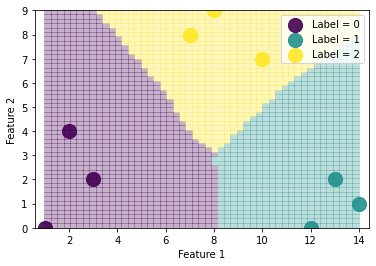

In [3]:
def plot_decision_surface(classifier, x, labels, ax=None, colors=None, n=50, alpha=0.3, marker_size=200, marker_alpha=0.9):
    nlabels   = np.unique( labels ).size
    colors    = plt.cm.viridis( np.linspace(0,1,nlabels) )  if (colors is None) else colors
    ax        = plt.gca() if (ax is None) else ax
    xmin,xmax = x.min(axis=0), x.max(axis=0)
    Xp,Yp     = np.meshgrid( np.linspace(xmin[0],xmax[0],n) , np.linspace(xmin[1],xmax[1],n) )
    xp        = np.vstack( [Xp.flatten(), Yp.flatten()] ).T
    labelsp   = classifier.predict(xp)
    Labelsp   = np.reshape(labelsp, Xp.shape)
    cmap      = ListedColormap(colors)
    for i,label in enumerate( np.unique(labels) ):
        xx   = x[labels==label]
        ax.scatter( xx[:,0], xx[:,1], color=colors[i], s=marker_size, alpha=marker_alpha, label=f'Label = {label}' )
    plt.pcolormesh(Xp, Yp, Labelsp, cmap=cmap, alpha=alpha)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.axis('equal')
    ax.legend()




plt.figure()
ax = plt.axes()
plot_decision_surface(knc, x, labels, ax=ax)
plt.show()

<br>
<br>

If you do not like the default colors, you can specify a list of [matplotlib colors](https://matplotlib.org/3.1.0/tutorials/colors/colors.html) using the `colors` keyword argument:

<br>
<br>

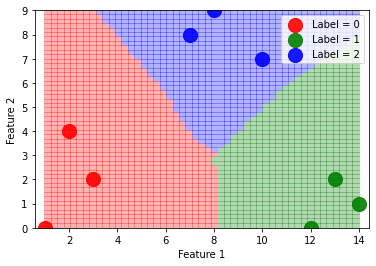

In [4]:
plt.figure()
ax = plt.axes()
plot_decision_surface(knc, x, labels, colors=['r', 'g', 'b'], ax=ax)
plt.show()

<br>
<br>

You'll notice that the **decision specifies** specifies the labels for all points (i.e., an infinite number of points) across the feature space. This makes it convenient for understanding both how the classifier works, and the nature of the **decision boundaries** between classes.

In this case, the **decision boundaries** are all essentially straight lines. You can see this more clearly by increasing the resolution of the decision surface, using the `n` keyword argument:


<br>
<br>

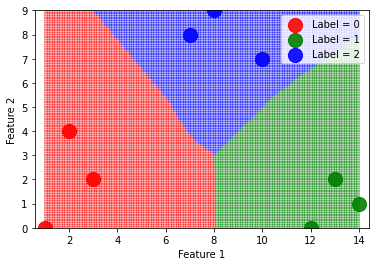

In [5]:
plt.figure()
plot_decision_surface(knc, x, labels, colors=['r', 'g', 'b'], n=128)
plt.show()

<br>
<br>

Decision surfaces are very useful for understanding the behavior of different types of classifiers, and will be used extensively in subsequent notebooks to explain classification concepts.

<br>
<br>